# Biološki oscilatori

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Parametri i pocetni uslovi
alpha0 = 0.1
alpha = 100.0
beta = 0.1
n = 2

m1_0, m2_0, m3_0 = 5.0, 20.0, 12.0
p1_0, p2_0, p3_0 = 0.0, 0.0, 0.0

dt = 0.01
t_end = 500.0
t = np.arange(0.0, t_end + dt, dt)

# Nizovi
m1 = np.zeros_like(t); m2 = np.zeros_like(t); m3 = np.zeros_like(t)
p1 = np.zeros_like(t); p2 = np.zeros_like(t); p3 = np.zeros_like(t)

m1[0], m2[0], m3[0] = m1_0, m2_0, m3_0
p1[0], p2[0], p3[0] = p1_0, p2_0, p3_0

In [3]:
# Funkcija represije iRNK
def mrna_repression(p):
    return alpha / (1.0 + p**n)

In [4]:
# Izracunavanje
for i in range(len(t) - 1):
    m1_i, m2_i, m3_i = m1[i], m2[i], m3[i]
    p1_i, p2_i, p3_i = p1[i], p2[i], p3[i]

    dm1 = alpha0 + mrna_repression(p3_i) - m1_i
    dm2 = alpha0 + mrna_repression(p1_i) - m2_i
    dm3 = alpha0 + mrna_repression(p2_i) - m3_i

    dp1 = beta * (m1_i - p1_i)
    dp2 = beta * (m2_i - p2_i)
    dp3 = beta * (m3_i - p3_i)

    m1[i+1] = m1_i + dt * dm1
    m2[i+1] = m2_i + dt * dm2
    m3[i+1] = m3_i + dt * dm3

    p1[i+1] = p1_i + dt * dp1
    p2[i+1] = p2_i + dt * dp2
    p3[i+1] = p3_i + dt * dp3

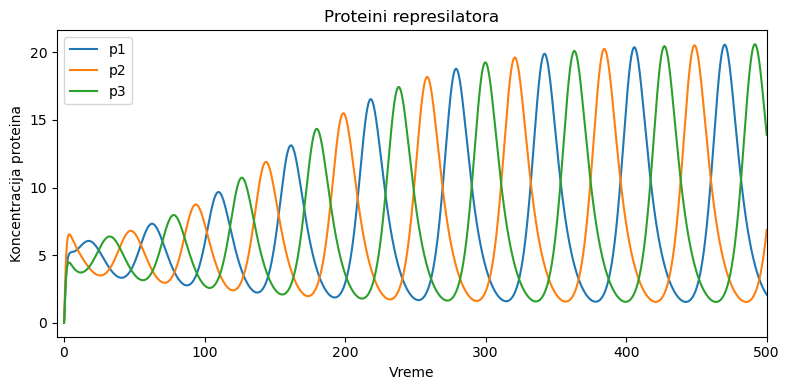

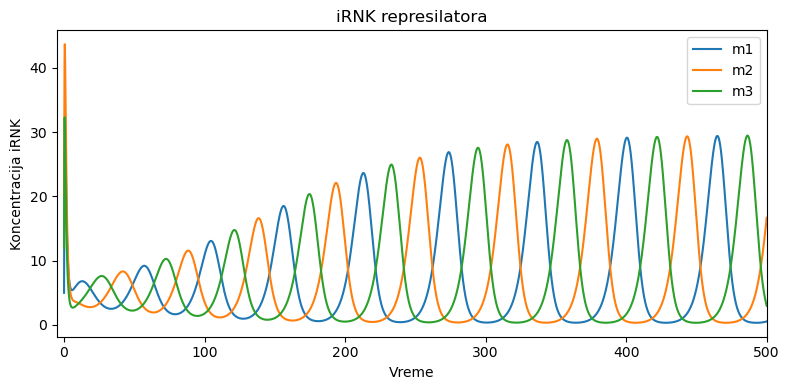

In [5]:
# Grafik (proteini)
plt.figure(figsize=(8,4))
plt.plot(t, p1, label="p1")
plt.plot(t, p2, label="p2")
plt.plot(t, p3, label="p3")
plt.xlabel("Vreme")
plt.ylabel("Koncentracija proteina")
plt.title("Proteini represilatora")
plt.xlim(-5, 500)
plt.legend()
plt.tight_layout()
plt.show()

# Grafik (iRNK)
plt.figure(figsize=(8,4))
plt.plot(t, m1, label="m1")
plt.plot(t, m2, label="m2")
plt.plot(t, m3, label="m3")
plt.xlabel("Vreme")
plt.ylabel("Koncentracija iRNK")
plt.title("iRNK represilatora")
plt.xlim(-5, 500)
plt.legend()
plt.tight_layout()
plt.show()

### **1. Simulirajte dinamiku sistema pri vrednosti Hilove konstante n = 1.5. Da li sistem i dalje osciluje u dugoročnom režimu? Kako kooperativnost (koja doprinosi nelinearnosti ulaza i izlaza) utiče na oscilatorno ponašanje sistema?**

Oscilacije zahtevaju određeni nivo nelinearnosti (koja proističe iz kooperativne represije), kao i kašnjenja u ostvarivanju povratne sprege. Kada je kooperativnost snižena, u sistemu sa tri člana jednostavno nema dovoljno vremena da se ostvari dovoljno jaka povratna sprega. Stoga nastaju prigušene oscilacije i sistem postiže stabilno stacionarno stanje.

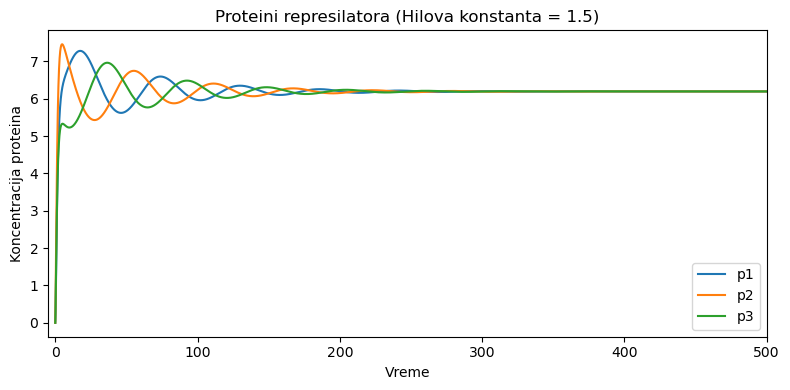

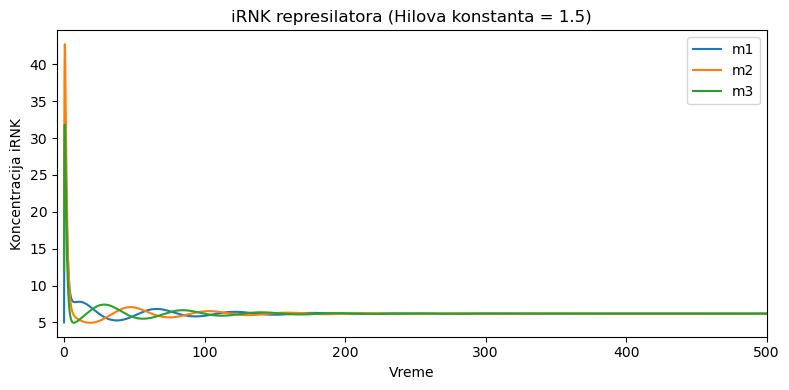

In [6]:
# Varijanta za n = 1.5
n = 1.5

# Izracunavanje
for i in range(len(t) - 1):
    m1_i, m2_i, m3_i = m1[i], m2[i], m3[i]
    p1_i, p2_i, p3_i = p1[i], p2[i], p3[i]

    dm1 = alpha0 + mrna_repression(p3_i) - m1_i
    dm2 = alpha0 + mrna_repression(p1_i) - m2_i
    dm3 = alpha0 + mrna_repression(p2_i) - m3_i

    dp1 = beta * (m1_i - p1_i)
    dp2 = beta * (m2_i - p2_i)
    dp3 = beta * (m3_i - p3_i)

    m1[i+1] = m1_i + dt * dm1
    m2[i+1] = m2_i + dt * dm2
    m3[i+1] = m3_i + dt * dm3

    p1[i+1] = p1_i + dt * dp1
    p2[i+1] = p2_i + dt * dp2
    p3[i+1] = p3_i + dt * dp3

# Grafik (proteini)
plt.figure(figsize=(8,4))
plt.plot(t, p1, label="p1")
plt.plot(t, p2, label="p2")
plt.plot(t, p3, label="p3")
plt.xlabel("Vreme")
plt.ylabel("Koncentracija proteina")
plt.title(f"Proteini represilatora (Hilova konstanta = {n})")
plt.xlim(-5, 500)
plt.legend()
plt.tight_layout()
plt.show()

# Grafik (iRNK)
plt.figure(figsize=(8,4))
plt.plot(t, m1, label="m1")
plt.plot(t, m2, label="m2")
plt.plot(t, m3, label="m3")
plt.xlabel("Vreme")
plt.ylabel("Koncentracija iRNK")
plt.title(f"iRNK represilatora (Hilova konstanta = {n})")
plt.xlim(-5, 500)
plt.legend()
plt.tight_layout()
plt.show()

### **2. Modelirajte proširenu mrežu represilatora u kojoj petlju čini 5 gena (umesto sadašnja 3) i simulirajte njenu dinamiku za n = 1.5. Zadajte sledeće početne uslove za koncentracije transkripata: [5, 20, 12, 8, 25]. Kakvo je dugoročno ponašanje sistema? Kako to objašnjavate? Zašto represilator spada u kategoriju oscilatora sa kašnjenjem (eng. *delay oscillator*)?**

U ovom slučaju, iako je Hilova konstanta jednaka onoj u prethodnom primeru, radi se upravo o tome da postoji dovoljno vremena da se ostvari odgovarajuća jačina efekta povratne sprege. U biološkom smislu, to bi podrazumevalo vreme neophodno za transkripciju i translaciju proteina. Upravo zato govorimo o ovom oscilatoru kao oscilatoru sa kašnjenjem. Ipak, ako bi se vrednost Hilove konstante smanjila ispod neke kritične vrednosti, ni u ovom slučaju oscilacije ne bi bile održive.

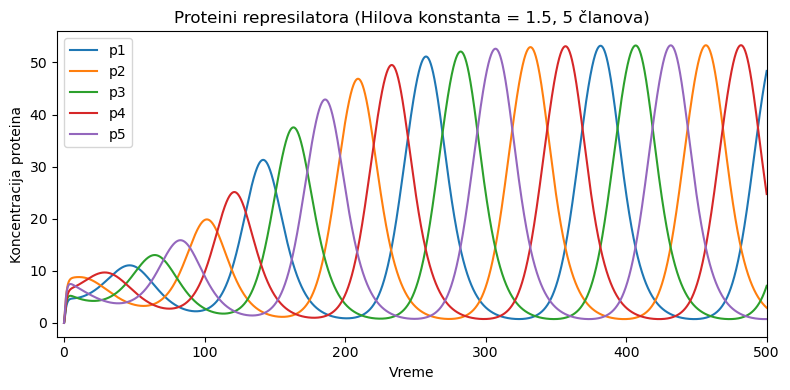

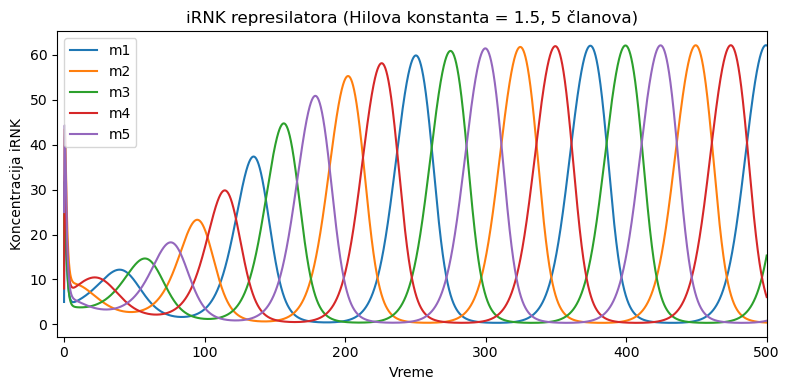

In [7]:
# Varijanta sa 5 gena, n = 1.5
n = 1.5

# Pocetni uslovi i nizovi
m1_0, m2_0, m3_0, m4_0, m5_0 = 5.0, 20.0, 12.0, 8.0, 25.0
p1_0, p2_0, p3_0, p4_0, p5_0 = 0.0, 0.0, 0.0, 0.0, 0.0

m1 = np.zeros_like(t); m2 = np.zeros_like(t); m3 = np.zeros_like(t); m4 = np.zeros_like(t); m5 = np.zeros_like(t)
p1 = np.zeros_like(t); p2 = np.zeros_like(t); p3 = np.zeros_like(t); p4 = np.zeros_like(t); p5 = np.zeros_like(t)

m1[0], m2[0], m3[0], m4[0], m5[0] = m1_0, m2_0, m3_0, m4_0, m5_0
p1[0], p2[0], p3[0], p4[0], p5[0] = p1_0, p2_0, p3_0, p4_0, p5_0

# Izracunavanje
for i in range(len(t) - 1):
    m1_i, m2_i, m3_i, m4_i, m5_i = m1[i], m2[i], m3[i], m4[i], m5[i]
    p1_i, p2_i, p3_i, p4_i, p5_i = p1[i], p2[i], p3[i], p4[i], p5[i]

    dm1 = alpha0 + mrna_repression(p5_i) - m1_i
    dm2 = alpha0 + mrna_repression(p1_i) - m2_i
    dm3 = alpha0 + mrna_repression(p2_i) - m3_i
    dm4 = alpha0 + mrna_repression(p3_i) - m4_i
    dm5 = alpha0 + mrna_repression(p4_i) - m5_i

    dp1 = beta * (m1_i - p1_i)
    dp2 = beta * (m2_i - p2_i)
    dp3 = beta * (m3_i - p3_i)
    dp4 = beta * (m4_i - p4_i)
    dp5 = beta * (m5_i - p5_i)

    m1[i+1] = m1_i + dt * dm1
    m2[i+1] = m2_i + dt * dm2
    m3[i+1] = m3_i + dt * dm3
    m4[i+1] = m4_i + dt * dm4
    m5[i+1] = m5_i + dt * dm5

    p1[i+1] = p1_i + dt * dp1
    p2[i+1] = p2_i + dt * dp2
    p3[i+1] = p3_i + dt * dp3
    p4[i+1] = p4_i + dt * dp4
    p5[i+1] = p5_i + dt * dp5

# Grafik (proteini)
plt.figure(figsize=(8,4))
plt.plot(t, p1, label="p1")
plt.plot(t, p2, label="p2")
plt.plot(t, p3, label="p3")
plt.plot(t, p4, label="p4")
plt.plot(t, p5, label="p5")
plt.xlabel("Vreme")
plt.ylabel("Koncentracija proteina")
plt.title(f"Proteini represilatora (Hilova konstanta = {n}, 5 članova)")
plt.xlim(-5, 500)
plt.legend()
plt.tight_layout()
plt.show()

# Grafik (iRNK)
plt.figure(figsize=(8,4))
plt.plot(t, m1, label="m1")
plt.plot(t, m2, label="m2")
plt.plot(t, m3, label="m3")
plt.plot(t, m4, label="m4")
plt.plot(t, m5, label="m5")
plt.xlabel("Vreme")
plt.ylabel("Koncentracija iRNK")
plt.title(f"iRNK represilatora (Hilova konstanta = {n}, 5 članova)")
plt.xlim(-5, 500)
plt.legend()
plt.tight_layout()
plt.show()

### **3. Zašto se za petlju od 4 uzastopna oscilatora ne očekuju oscilacije?**

Zato što u slučaju parnog broja članova, u kolu se javlja neto pozitivna povratna sprega. Npr. ako P1 vrši represiju P2, biće manje P2. Ako P2 vrši represiju P3, biće više P3. Ako ima više P3, biće manje P4. Manje P4 znači više P1, što opet znači manje P2 i tako ukrug. U primeru niže vidi se da se ustaljuju dva stabilna stanja (jedno više koncentracije i drugo niže koncentracije) sa po dva proteina u njima. Koji će tačno proteini "prevagnuti" zavisi od njihovih početnih koncentracija u odnosu na susedne proteine u petlji.

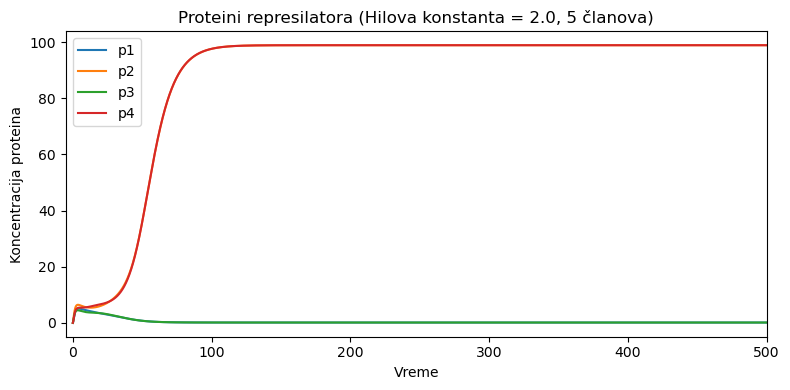

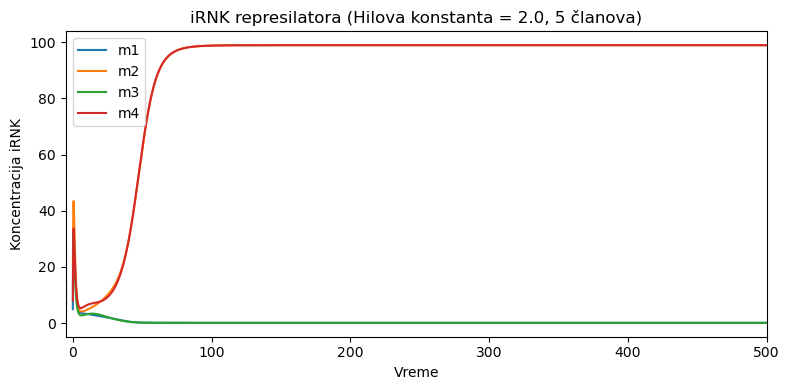

In [8]:
# Varijanta sa 4 gena, n = 2.0
n = 2.0

# Pocetni uslovi i nizovi
m1_0, m2_0, m3_0, m4_0 = 5.0, 20.0, 12.0, 8.0
p1_0, p2_0, p3_0, p4_0 = 0.0, 0.0, 0.0, 0.0

m1 = np.zeros_like(t); m2 = np.zeros_like(t); m3 = np.zeros_like(t); m4 = np.zeros_like(t)
p1 = np.zeros_like(t); p2 = np.zeros_like(t); p3 = np.zeros_like(t); p4 = np.zeros_like(t)

m1[0], m2[0], m3[0], m4[0] = m1_0, m2_0, m3_0, m4_0
p1[0], p2[0], p3[0], p4[0] = p1_0, p2_0, p3_0, p4_0

# Izracunavanje
for i in range(len(t) - 1):
    m1_i, m2_i, m3_i, m4_i = m1[i], m2[i], m3[i], m4[i]
    p1_i, p2_i, p3_i, p4_i = p1[i], p2[i], p3[i], p4[i]

    dm1 = alpha0 + mrna_repression(p4_i) - m1_i
    dm2 = alpha0 + mrna_repression(p1_i) - m2_i
    dm3 = alpha0 + mrna_repression(p2_i) - m3_i
    dm4 = alpha0 + mrna_repression(p3_i) - m4_i

    dp1 = beta * (m1_i - p1_i)
    dp2 = beta * (m2_i - p2_i)
    dp3 = beta * (m3_i - p3_i)
    dp4 = beta * (m4_i - p4_i)

    m1[i+1] = m1_i + dt * dm1
    m2[i+1] = m2_i + dt * dm2
    m3[i+1] = m3_i + dt * dm3
    m4[i+1] = m4_i + dt * dm4

    p1[i+1] = p1_i + dt * dp1
    p2[i+1] = p2_i + dt * dp2
    p3[i+1] = p3_i + dt * dp3
    p4[i+1] = p4_i + dt * dp4

# Grafik (proteini)
plt.figure(figsize=(8,4))
plt.plot(t, p1, label="p1")
plt.plot(t, p2, label="p2")
plt.plot(t, p3, label="p3")
plt.plot(t, p4, label="p4")
plt.xlabel("Vreme")
plt.ylabel("Koncentracija proteina")
plt.title(f"Proteini represilatora (Hilova konstanta = {n}, 5 članova)")
plt.xlim(-5, 500)
plt.legend()
plt.tight_layout()
plt.show()

# Grafik (iRNK)
plt.figure(figsize=(8,4))
plt.plot(t, m1, label="m1")
plt.plot(t, m2, label="m2")
plt.plot(t, m3, label="m3")
plt.plot(t, m4, label="m4")
plt.xlabel("Vreme")
plt.ylabel("Koncentracija iRNK")
plt.title(f"iRNK represilatora (Hilova konstanta = {n}, 5 članova)")
plt.xlim(-5, 500)
plt.legend()
plt.tight_layout()
plt.show()